In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import IPython
import IPython.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from flowability_data_upload.Research.main import Data

# Data Prep

In [4]:
%%capture

def load_data():
    x = Data()
    x.importnewpowders()
    df_data = pd.DataFrame(x.data)
    df_flow = pd.DataFrame(x.flow)
    df_noflow = pd.DataFrame(x.noflow)

    return df_data, df_flow, df_noflow

df_data, df_flow, df_noflow = load_data()

df_all = df_data.copy()

pd.set_option('display.max_columns', None)

In [5]:
df_noflow['Powder'].unique()

array(['MW_I_718_0-10.txt', 'S1VRC0706-5_Excel.txt',
       'HCS_C103H_+10,-45.txt', 'S1VRC0706-4_Excel.txt',
       'AEE_WP-301_1-5_AA_3-7.txt', 'HCS_C103N2_+10,-45.txt',
       'HCS_C103N1_+10,-45.txt', 'S1VRC0706-6_Excel.txt',
       'Valimet_6061_SPE.txt'], dtype=object)

In [6]:
df_noflow = df_noflow.reset_index(drop = True)

train_noflow_powders = ['MW_I_718_0-10.txt', 'S1VRC0706-5_Excel.txt',
       'HCS_C103H_+10,-45.txt', 'S1VRC0706-4_Excel.txt',
       'AEE_WP-301_1-5_AA_3-7.txt']
test_noflow_powders = ['HCS_C103N2_+10,-45.txt',
       'HCS_C103N1_+10,-45.txt', 'S1VRC0706-6_Excel.txt',
       'Valimet_6061_SPE.txt']

train_df_noflow = df_noflow.drop(df_noflow[df_noflow['Powder'].isin(test_noflow_powders)].index)
test_df_noflow = df_noflow.drop(df_noflow[df_noflow['Powder'].isin(train_noflow_powders)].index)

train_powder_noflow = train_df_noflow.pop("Powder")
train_df_noflow.pop("Flow")
train_target_noflow = train_df_noflow.pop("Flow Class")

test_powder_noflow = test_df_noflow.pop("Powder")
test_df_noflow.pop("Flow")
test_target_noflow = test_df_noflow.pop("Flow Class")

In [7]:
from sklearn.preprocessing import StandardScaler
noflow_scaler = StandardScaler()

X_valid_noflow = train_df_noflow.sample(int(len(train_df_noflow) * 0.2))
X_train_noflow = train_df_noflow.drop(X_valid_noflow.index)

X_train_noflow = noflow_scaler.fit_transform(X_train_noflow)
X_valid_noflow = noflow_scaler.transform(X_valid_noflow)
X_test_noflow = noflow_scaler.transform(test_df_noflow)

In [8]:
df_flow['Powder'].unique()

array(['S1VRC0706-3_Excel.txt', 'WIP-C1.txt', 'WIP-W1.txt',
       'MW_Ti-Nb-Zr_0-63.txt', 'WIP-W2.txt', 'MW_Ti-Nb-Zr_64-150.txt',
       'V5_Al-P1015_99.8%-Al.txt', 'MW_Ti-Nb_64-150.txt',
       'S1VRC0706-2_Excel.txt', 'MW_SS-17-4_64-150.txt',
       'Lincoln_SHS_7574HV.txt', 'Lincoln_SHS_9172HV.txt',
       'Al-Cr_75-Percent_6061_1.1.txt', 'MW_SS-17-4_10-45.txt',
       'MW_Ti-Nb_0-63.txt', 'S1VRC0706-1_Excel.txt',
       'Lincoln_SHS_8000HV.txt', 'V_AA-4047.txt', 'V_AA-2024.txt',
       'WIP-BC1.txt', 'HCS_TaH_-230+PAN.txt', 'V_Al-P1015_99.8%-Al.txt',
       'V6_Al-P1015_99.8%-Al.txt', 'MW_FeMnAl-C_0-45.txt'], dtype=object)

In [9]:
df_flow = df_flow.reset_index(drop = True)

train_flow_powders = ['S1VRC0706-3_Excel.txt', 'WIP-C1.txt', 'WIP-W1.txt',
       'MW_Ti-Nb-Zr_0-63.txt', 'WIP-W2.txt', 'MW_Ti-Nb-Zr_64-150.txt',
       'V5_Al-P1015_99.8%-Al.txt', 'MW_Ti-Nb_64-150.txt',
       'S1VRC0706-2_Excel.txt', 'MW_SS-17-4_64-150.txt',
       'Lincoln_SHS_7574HV.txt', 'Lincoln_SHS_9172HV.txt',
       'Al-Cr_75-Percent_6061_1.1.txt', 
       'MW_Ti-Nb_0-63.txt', 'S1VRC0706-1_Excel.txt',
       'Lincoln_SHS_8000HV.txt', 'V_AA-4047.txt', 'V_AA-2024.txt', 'V6_Al-P1015_99.8%-Al.txt']
test_flow_powders = ['WIP-BC1.txt', 'HCS_TaH_-230+PAN.txt', 'V_Al-P1015_99.8%-Al.txt',
       'MW_SS-17-4_10-45.txt', 'MW_FeMnAl-C_0-45.txt']

train_df_flow = df_flow.drop(df_flow[df_flow['Powder'].isin(test_flow_powders)].index)
test_df_flow = df_flow.drop(df_flow[df_flow['Powder'].isin(train_flow_powders)].index)

train_powder_flow = train_df_flow.pop("Powder")
train_flow = train_df_flow.pop("Flow")
train_target_flow = train_df_flow.pop("Flow Class")

test_powder_flow = test_df_flow.pop("Powder")
test_flow = test_df_flow.pop("Flow")
test_target_flow = test_df_flow.pop("Flow Class")

In [10]:
from sklearn.preprocessing import StandardScaler
flow_scaler = StandardScaler()

X_valid_flow = train_df_flow.sample(int(len(train_df_flow) * 0.2))
X_train_flow = train_df_flow.drop(X_valid_flow.index)

X_train_flow = flow_scaler.fit_transform(X_train_flow)
X_valid_flow = flow_scaler.transform(X_valid_flow)
X_test_flow = flow_scaler.transform(test_df_flow)

# Auto Encoder

## Flow AutoEncoder

In [11]:
# data dimensions // hyperparameters 
input_dim = X_train_flow.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
flow_autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(3, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
flow_autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])


2022-12-18 18:56:33.987930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(flow_autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]


In [13]:
history = flow_autoencoder.fit(
    X_train_flow, X_train_flow,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_valid_flow, X_valid_flow)
)

Epoch 1/100
354/354 [==============================] - 1s 2ms/step - loss: 0.4268 - acc: 0.2626 - val_loss: 0.2065 - val_acc: 0.3652
Epoch 2/100
354/354 [==============================] - 1s 2ms/step - loss: 0.1743 - acc: 0.4602 - val_loss: 0.1479 - val_acc: 0.5040
Epoch 3/100
354/354 [==============================] - 1s 2ms/step - loss: 0.1418 - acc: 0.5164 - val_loss: 0.1320 - val_acc: 0.5455
Epoch 4/100
354/354 [==============================] - 1s 2ms/step - loss: 0.1257 - acc: 0.5618 - val_loss: 0.1158 - val_acc: 0.5852
Epoch 5/100
354/354 [==============================] - 1s 2ms/step - loss: 0.1118 - acc: 0.5899 - val_loss: 0.1089 - val_acc: 0.5895
Epoch 6/100
354/354 [==============================] - 1s 2ms/step - loss: 0.1070 - acc: 0.5917 - val_loss: 0.1060 - val_acc: 0.5880
Epoch 7/100
354/354 [==============================] - 1s 2ms/step - loss: 0.1049 - acc: 0.5934 - val_loss: 0.1045 - val_acc: 0.5972
Epoch 8/100
354/354 [==============================] - 1s 2ms/step - 

In [19]:
reconstructions = flow_autoencoder.predict(X_test_flow)
# calculating the mean squared error reconstruction loss per row in the numpy array
flow_mse = np.mean(np.power(X_test_flow - reconstructions, 2), axis=1)
flow_mse

1202/1202 [==============================] - 1s 529us/step


array([0.133, 0.375, 0.318, ..., 0.905, 1.455, 1.178])

In [20]:
test_RE_flow = pd.concat([test_powder_flow, pd.Series(flow_mse, index=test_powder_flow.index, name="Reconstruction Error")], axis = 1)
print("FLOW POWDER | RECONSTRUCTION LOSS")
for powder, group in test_RE_flow.groupby('Powder'):
   print(f"{powder[:-4]} | {np.mean(group['Reconstruction Error']):.3f}")

FLOW POWDER | RECONSTRUCTION LOSS
HCS_TaH_-230+PAN | 0.123
MW_FeMnAl-C_0-45 | 0.055
MW_SS-17-4_10-45 | 0.048
V_Al-P1015_99.8%-Al | 0.123
WIP-BC1 | 0.089


In [21]:
noflow_reconstructions = flow_autoencoder.predict(X_test_noflow)
# calculating the mean squared error reconstruction loss per row in the numpy array
noflow_mse = np.mean(np.power(X_test_noflow - noflow_reconstructions, 2), axis=1)
noflow_mse

736/736 [==============================] - 0s 525us/step


array([4.495, 3.681, 4.262, ..., 0.038, 0.529, 0.099])

In [22]:
test_RE_noflow = pd.concat([test_powder_noflow, pd.Series(noflow_mse, index=test_powder_noflow.index, name="Reconstruction Error")], axis = 1)
print("NOFLOW POWDER | RECONSTRUCTION LOSS")
for powder, group in test_RE_noflow.groupby('Powder'):
    print(f"{powder[:-4]} | {np.mean(group['Reconstruction Error']):.3f}")

NOFLOW POWDER | RECONSTRUCTION LOSS
HCS_C103N1_+10,-45 | 0.309
HCS_C103N2_+10,-45 | 0.227
S1VRC0706-6_Excel | 0.362
Valimet_6061_SPE | 0.805


In [24]:
noflow_reconstructions = flow_autoencoder.predict(flow_scaler.transform(train_df_noflow))
# calculating the mean squared error reconstruction loss per row in the numpy array
noflow_mse = np.mean(np.power(flow_scaler.transform(train_df_noflow) - noflow_reconstructions, 2), axis=1)
noflow_mse

3015/3015 [==============================] - 2s 504us/step


array([1.514, 0.046, 1.124, ..., 1.799, 1.966, 1.882])

In [25]:
train_RE_noflow = pd.concat([train_powder_noflow, pd.Series(noflow_mse, index=train_powder_noflow.index, name="Reconstruction Error")], axis = 1)
print("NOFLOW POWDER | RECONSTRUCTION LOSS")
for powder, group in train_RE_noflow.groupby('Powder'):
    print(f"{powder[:-4]} | {np.mean(group['Reconstruction Error']):.3f}")

NOFLOW POWDER | RECONSTRUCTION LOSS
AEE_WP-301_1-5_AA_3-7 | 0.380
HCS_C103H_+10,-45 | 0.071
MW_I_718_0-10 | 0.085
S1VRC0706-4_Excel | 0.116
S1VRC0706-5_Excel | 0.104


# Second Attempt

In [26]:
%%capture

def load_data():
    x = Data()
    x.importnewpowders()
    df_data = pd.DataFrame(x.data)
    df_flow = pd.DataFrame(x.flow)
    df_noflow = pd.DataFrame(x.noflow)

    return df_data, df_flow, df_noflow

df_data, df_flow, df_noflow = load_data()

df_all = df_data.copy()

pd.set_option('display.max_columns', None)

In [27]:
df_flow[["Powder", "Flow"]].drop_duplicates().sort_values("Flow")[:-7].Powder.unique()

array(['MW_Ti-Nb_64-150.txt', 'MW_Ti-Nb_0-63.txt', 'HCS_TaH_-230+PAN.txt',
       'MW_SS-17-4_10-45.txt', 'Lincoln_SHS_9172HV.txt',
       'MW_SS-17-4_64-150.txt', 'Lincoln_SHS_7574HV.txt',
       'Lincoln_SHS_8000HV.txt', 'WIP-BC1.txt', 'S1VRC0706-3_Excel.txt',
       'WIP-C1.txt', 'S1VRC0706-1_Excel.txt', 'WIP-W1.txt',
       'MW_Ti-Nb-Zr_64-150.txt', 'S1VRC0706-2_Excel.txt',
       'MW_Ti-Nb-Zr_0-63.txt', 'WIP-W2.txt'], dtype=object)

In [28]:
df_flow[["Powder", "Flow"]].drop_duplicates().sort_values("Flow")[-7:].Powder.unique()

array(['V6_Al-P1015_99.8%-Al.txt', 'V_Al-P1015_99.8%-Al.txt',
       'V_AA-4047.txt', 'V5_Al-P1015_99.8%-Al.txt', 'V_AA-2024.txt',
       'MW_FeMnAl-C_0-45.txt', 'Al-Cr_75-Percent_6061_1.1.txt'],
      dtype=object)

In [29]:
from sklearn.model_selection import train_test_split

df_flow = df_flow.copy().reset_index(drop = True)

good_flow_powders = ['MW_Ti-Nb_64-150.txt', 'MW_Ti-Nb_0-63.txt', 'HCS_TaH_-230+PAN.txt',
       'MW_SS-17-4_10-45.txt', 'Lincoln_SHS_9172HV.txt',
       'MW_SS-17-4_64-150.txt', 'Lincoln_SHS_7574HV.txt',
       'Lincoln_SHS_8000HV.txt', 'WIP-BC1.txt', 'S1VRC0706-3_Excel.txt',
       'WIP-C1.txt', 'S1VRC0706-1_Excel.txt', 'WIP-W1.txt',
       'MW_Ti-Nb-Zr_64-150.txt', 'S1VRC0706-2_Excel.txt',
       'MW_Ti-Nb-Zr_0-63.txt', 'WIP-W2.txt']
bad_flow_powders = ['V6_Al-P1015_99.8%-Al.txt', 'V_Al-P1015_99.8%-Al.txt',
       'V_AA-4047.txt', 'V5_Al-P1015_99.8%-Al.txt', 'V_AA-2024.txt',
       'MW_FeMnAl-C_0-45.txt', 'Al-Cr_75-Percent_6061_1.1.txt']

train_flow_powders, test_flow_powders = train_test_split(good_flow_powders, test_size=0.5)

df_badflow = df_flow[df_flow["Powder"].isin(bad_flow_powders)]
df_flow = df_flow.drop(df_flow[df_flow["Powder"].isin(bad_flow_powders)].index)

train_df_flow = df_flow.drop(df_flow[df_flow['Powder'].isin(test_flow_powders)].index)
test_df_flow = df_flow.drop(df_flow[df_flow['Powder'].isin(train_flow_powders)].index)

train_powder_flow = train_df_flow.pop("Powder")
train_flow = train_df_flow.pop("Flow")
train_target_flow = train_df_flow.pop("Flow Class")

test_powder_flow = test_df_flow.pop("Powder")
test_flow = test_df_flow.pop("Flow")
test_target_flow = test_df_flow.pop("Flow Class")

bad_powder_flow = df_badflow.pop("Powder")
bad_flow = df_badflow.pop("Flow")
bad_target_flow = df_badflow.pop("Flow Class")


In [30]:
from sklearn.preprocessing import StandardScaler
flow_scaler = StandardScaler()

X_valid_flow = train_df_flow.sample(int(len(train_df_flow) * 0.2))
X_train_flow = train_df_flow.drop(X_valid_flow.index)

X_train_flow = flow_scaler.fit_transform(X_train_flow)
X_valid_flow = flow_scaler.transform(X_valid_flow)
X_test_flow = flow_scaler.transform(test_df_flow)

X_bad_flow = flow_scaler.transform(df_badflow)

In [31]:
df_noflow = df_noflow.reset_index(drop = True)

train_noflow_powders = ['MW_I_718_0-10.txt', 'S1VRC0706-5_Excel.txt',
       'HCS_C103H_+10,-45.txt', 'S1VRC0706-4_Excel.txt',
       'AEE_WP-301_1-5_AA_3-7.txt']
test_noflow_powders = ['HCS_C103N2_+10,-45.txt',
       'HCS_C103N1_+10,-45.txt', 'S1VRC0706-6_Excel.txt',
       'Valimet_6061_SPE.txt']

train_df_noflow = df_noflow.drop(df_noflow[df_noflow['Powder'].isin(test_noflow_powders)].index)
test_df_noflow = df_noflow.drop(df_noflow[df_noflow['Powder'].isin(train_noflow_powders)].index)

train_powder_noflow = train_df_noflow.pop("Powder")
train_df_noflow.pop("Flow")
train_target_noflow = train_df_noflow.pop("Flow Class")

test_powder_noflow = test_df_noflow.pop("Powder")
test_df_noflow.pop("Flow")
test_target_noflow = test_df_noflow.pop("Flow Class")

In [32]:
from sklearn.preprocessing import StandardScaler
noflow_scaler = StandardScaler()

# X_valid_noflow = train_df_noflow.sample(int(len(train_df_noflow) * 0.2))
# X_train_noflow = train_df_noflow.drop(X_valid_noflow.index)

X_train_noflow = noflow_scaler.fit_transform(train_df_noflow)
#X_train_noflow = noflow_scaler.fit_transform(X_train_noflow)
# X_valid_noflow = noflow_scaler.transform(X_valid_noflow)
X_test_noflow = noflow_scaler.transform(test_df_noflow)

## GoodFlow AutoEncoder

In [33]:
# data dimensions // hyperparameters 
input_dim = X_train_flow.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
goodflow_autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(3, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
goodflow_autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])


In [34]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(goodflow_autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]


In [35]:
history = goodflow_autoencoder.fit(
    X_train_flow, X_train_flow,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_valid_flow, X_valid_flow)
)

Epoch 1/100
196/196 [==============================] - 1s 2ms/step - loss: 0.5143 - acc: 0.2230 - val_loss: 0.2596 - val_acc: 0.3206
Epoch 2/100
196/196 [==============================] - 0s 2ms/step - loss: 0.2259 - acc: 0.3178 - val_loss: 0.2011 - val_acc: 0.3164
Epoch 3/100
196/196 [==============================] - 0s 2ms/step - loss: 0.1942 - acc: 0.3527 - val_loss: 0.1860 - val_acc: 0.3781
Epoch 4/100
196/196 [==============================] - 0s 2ms/step - loss: 0.1836 - acc: 0.3820 - val_loss: 0.1772 - val_acc: 0.3919
Epoch 5/100
196/196 [==============================] - 0s 2ms/step - loss: 0.1633 - acc: 0.4210 - val_loss: 0.1293 - val_acc: 0.4961
Epoch 6/100
196/196 [==============================] - 0s 2ms/step - loss: 0.1151 - acc: 0.5509 - val_loss: 0.1067 - val_acc: 0.5740
Epoch 7/100
196/196 [==============================] - 0s 2ms/step - loss: 0.1072 - acc: 0.5803 - val_loss: 0.1036 - val_acc: 0.5927
Epoch 8/100
196/196 [==============================] - 0s 2ms/step - 

In [46]:
reconstructions = goodflow_autoencoder.predict(X_train_flow)
# calculating the mean squared error reconstruction loss per row in the numpy array
flow_mse = np.mean(np.power(X_train_flow - reconstructions, 2), axis=1)
flow_mse

1565/1565 [==============================] - 1s 533us/step


array([0.037, 0.004, 0.05 , ..., 0.01 , 0.012, 0.014])

In [37]:
reconstructions = goodflow_autoencoder.predict(X_test_flow)
# calculating the mean squared error reconstruction loss per row in the numpy array
flow_mse = np.mean(np.power(X_test_flow - reconstructions, 2), axis=1)
flow_mse

1706/1706 [==============================] - 1s 553us/step


array([0.304, 0.075, 3.131, ..., 0.038, 0.005, 0.05 ])

In [38]:
test_RE_flow = pd.concat([test_powder_flow, pd.Series(flow_mse, index=test_powder_flow.index, name="Reconstruction Error")], axis = 1)
print("FLOW POWDER | RECONSTRUCTION LOSS")
for powder, group in test_RE_flow.groupby('Powder'):
   print(f"{powder[:-4]} | {np.mean(group['Reconstruction Error']):.3f}")

FLOW POWDER | RECONSTRUCTION LOSS
HCS_TaH_-230+PAN | 0.148
Lincoln_SHS_7574HV | 0.134
MW_SS-17-4_10-45 | 0.052
MW_Ti-Nb-Zr_0-63 | 0.069
MW_Ti-Nb-Zr_64-150 | 0.344
MW_Ti-Nb_0-63 | 0.067
S1VRC0706-1_Excel | 0.120
S1VRC0706-2_Excel | 0.598
WIP-W1 | 0.162


In [ ]:
df_flow[["Powder", "Flow"]].drop_duplicates().sort_values("Flow")

,Powder,Flow
72074,MW_Ti-Nb_64-150.txt,2.380000
108235,MW_Ti-Nb_0-63.txt,2.550000
125748,HCS_TaH_-230+PAN.txt,4.545500
96526,MW_SS-17-4_10-45.txt,14.430000
81795,Lincoln_SHS_9172HV.txt,15.326667
72914,MW_SS-17-4_64-150.txt,16.030000
73731,Lincoln_SHS_7574HV.txt,16.260000
117595,Lincoln_SHS_8000HV.txt,16.866667
124225,WIP-BC1.txt,19.430000
0,S1VRC0706-3_Excel.txt,20.013333


In [39]:
reconstructions = goodflow_autoencoder.predict(X_bad_flow)
# calculating the mean squared error reconstruction loss per row in the numpy array
badflow_mse = np.mean(np.power(X_bad_flow - reconstructions, 2), axis=1)
badflow_mse

1072/1072 [==============================] - 1s 519us/step


array([0.438, 0.067, 0.213, ..., 0.967, 1.569, 1.261])

In [40]:
bad_RE_flow = pd.concat([bad_powder_flow, pd.Series(badflow_mse, index=bad_powder_flow.index, name="Reconstruction Error")], axis = 1)
print("BAD FLOW POWDER | RECONSTRUCTION LOSS")
for powder, group in bad_RE_flow.groupby('Powder'):
   print(f"{powder[:-4]} | {np.mean(group['Reconstruction Error']):.3f}")

BAD FLOW POWDER | RECONSTRUCTION LOSS
Al-Cr_75-Percent_6061_1.1 | 0.089
MW_FeMnAl-C_0-45 | 0.060
V5_Al-P1015_99.8%-Al | 0.132
V6_Al-P1015_99.8%-Al | 0.102
V_AA-2024 | 0.071
V_AA-4047 | 0.194
V_Al-P1015_99.8%-Al | 0.137


In [41]:
noflow_reconstructions = goodflow_autoencoder.predict(X_test_noflow)
# calculating the mean squared error reconstruction loss per row in the numpy array
noflow_mse = np.mean(np.power(X_test_noflow - noflow_reconstructions, 2), axis=1)
noflow_mse

736/736 [==============================] - 0s 508us/step


array([4.114, 3.128, 3.129, ..., 0.057, 0.515, 0.085])

In [42]:
test_RE_noflow = pd.concat([test_powder_noflow, pd.Series(noflow_mse, index=test_powder_noflow.index, name="Reconstruction Error")], axis = 1)
print("NOFLOW POWDER | RECONSTRUCTION LOSS")
for powder, group in test_RE_noflow.groupby('Powder'):
    print(f"{powder[:-4]} | {np.mean(group['Reconstruction Error']):.3f}")

NOFLOW POWDER | RECONSTRUCTION LOSS
HCS_C103N1_+10,-45 | 0.290
HCS_C103N2_+10,-45 | 0.214
S1VRC0706-6_Excel | 0.341
Valimet_6061_SPE | 0.774


In [43]:
noflow_reconstructions = goodflow_autoencoder.predict(X_train_noflow)
# calculating the mean squared error reconstruction loss per row in the numpy array
noflow_mse = np.mean(np.power(X_train_noflow - noflow_reconstructions, 2), axis=1)
noflow_mse

3015/3015 [==============================] - 2s 525us/step


array([4.198, 0.682, 2.152, ..., 1.178, 1.266, 1.203])

In [44]:
train_RE_noflow = pd.concat([train_powder_noflow, pd.Series(noflow_mse, index=train_powder_noflow.index, name="Reconstruction Error")], axis = 1)
print("NOFLOW POWDER | RECONSTRUCTION LOSS")
for powder, group in train_RE_noflow.groupby('Powder'):
    print(f"{powder[:-4]} | {np.mean(group['Reconstruction Error']):.3f}")

NOFLOW POWDER | RECONSTRUCTION LOSS
AEE_WP-301_1-5_AA_3-7 | 0.481
HCS_C103H_+10,-45 | 0.429
MW_I_718_0-10 | 0.091
S1VRC0706-4_Excel | 0.640
S1VRC0706-5_Excel | 0.626


In [83]:
RE = pd.concat([test_RE_flow, bad_RE_flow, train_RE_noflow, test_RE_noflow], keys=['test_RE_flow', 'bad_RE_flow', 'train_RE_noflow', 'test_RE_noflow'], axis = 0)
RE_g = RE.groupby(['Powder']).agg("mean")
# ax = RE_g.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
# plt.tight_layout()

<BarContainer object of 25 artists>

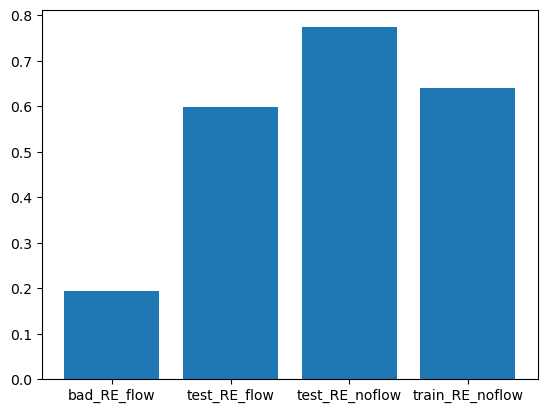

In [102]:
a = RE.copy()
a = a.reset_index()
a.pop('level_1')
grouped_df =  a.groupby(['level_0', 'Powder']).mean()
level_0 = grouped_df.index.get_level_values(0)
means = grouped_df.values
plt.bar(level_0,  np.squeeze(means))

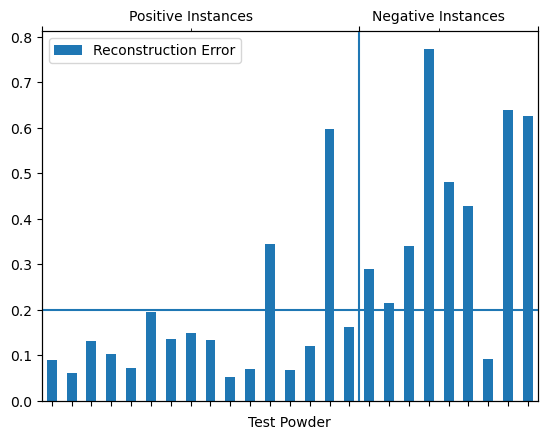

In [137]:
import matplotlib.ticker as ticker

ax = grouped_df.plot.bar()
ax.set_xticklabels("")
ax.set_xlabel("Test Powder")
ax2 =  ax.twiny()
offset = 0, -5

ax2.set_xticks([0.0, 0.64, 1.0])
ax2.axvline(0.64)
ax2.axhline(0.2)
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.3, 0.8]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['Positive Instances', 'Negative Instances']))